In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')




In [2]:
df= pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.trtbps.nunique()

49

# #for catagrical variable

###################### SEX #######################
   sex      ratio
1  207  68.316832
0   96  31.683168
**************************************************


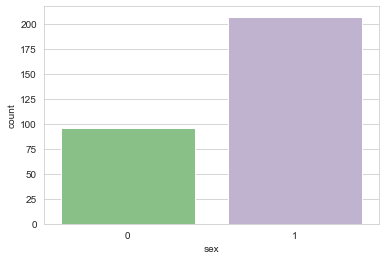

####################### CP #######################
    cp      ratio
0  143  47.194719
2   87  28.712871
1   50  16.501650
3   23   7.590759
**************************************************


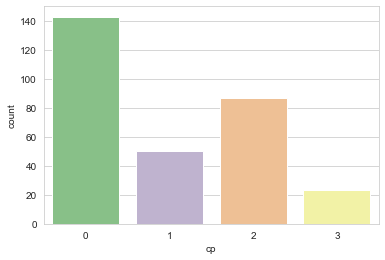

###################### FBS #######################
   fbs      ratio
0  258  85.148515
1   45  14.851485
**************************************************


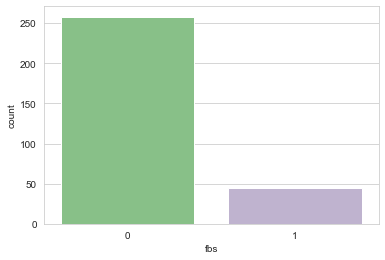

#################### RESTECG #####################
   restecg      ratio
1      152  50.165017
0      147  48.514851
2        4   1.320132
**************************************************


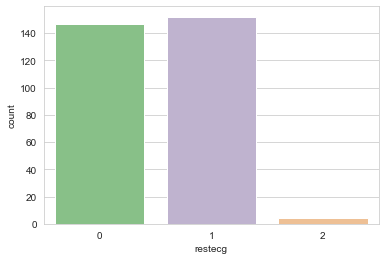

###################### EXNG ######################
   exng      ratio
0   204  67.326733
1    99  32.673267
**************************************************


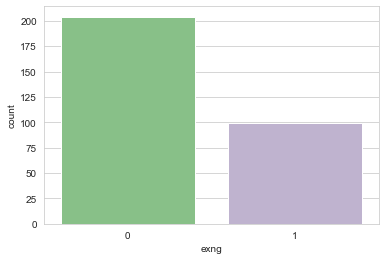

###################### SLP #######################
   slp      ratio
2  142  46.864686
1  140  46.204620
0   21   6.930693
**************************************************


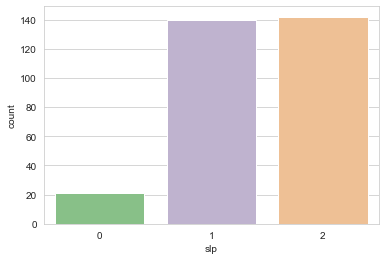

###################### CAA #######################
   caa      ratio
0  175  57.755776
1   65  21.452145
2   38  12.541254
3   20   6.600660
4    5   1.650165
**************************************************


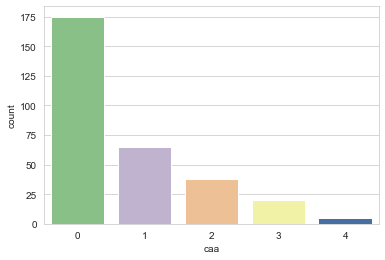

##################### THALL ######################
   thall      ratio
2    166  54.785479
3    117  38.613861
1     18   5.940594
0      2   0.660066
**************************************************


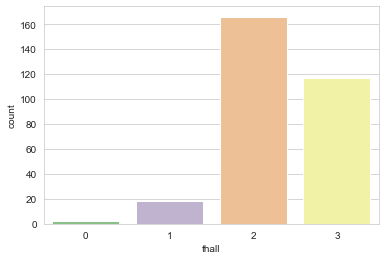

##################### OUTPUT #####################
   output      ratio
1     165  54.455446
0     138  45.544554
**************************************************


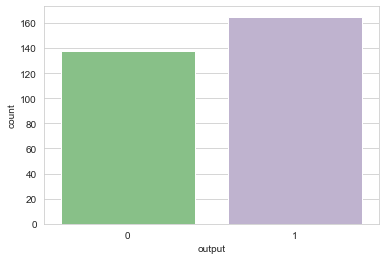

In [5]:
category_columns= [i for i in df.columns if df[i].dtype=="O"]
num_category = [i for i in df.columns if df[i].nunique() <10 and df[i].dtype !='O']
charecter_in_category= [i for i in df.columns if df[i].nunique()>20 and df[i].dtype=='O']

category_columns+=num_category
cat_col = [col for col in category_columns if col not in charecter_in_category]

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                       "ratio":100* dataframe[col_name].value_counts()/len(dataframe[col_name])
}))
    
    print("*"*50)
    sns.countplot(x=dataframe[col_name], data=dataframe, palette='Accent')
    plt.show()
for i in category_columns:
    print((' '+i.upper()+' ').center(50,'#'))
    cat_summary(df,i,plot=True)

In [6]:
def data_information(dataframe,head=5):
    print('head'.center(70,'#'))
    print(dataframe.head())
    print('shape'.center(70,'#'))
    print("row: {}".format(df.shape[0]))
    print("column: {}".format(df.shape[1]))
    print('info'.center(70,'#'))
    print(df.dtypes)
    print('missing value'.center(70,'#'))
    print(df.isnull().sum())
    print('Quantiles'.center(70,'#'))
    print(df.quantile([0,0.15,0.25,0.50,0.65,0.85,1]).T)
    print(' DUPLICATED VALUES '.center(70,'#'))
    print(dataframe.duplicated().sum())
data_information(df)   

#################################head#################################
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
################################shape#################################
row: 303
column: 14
#################################info#################################
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64


# for numeric variable

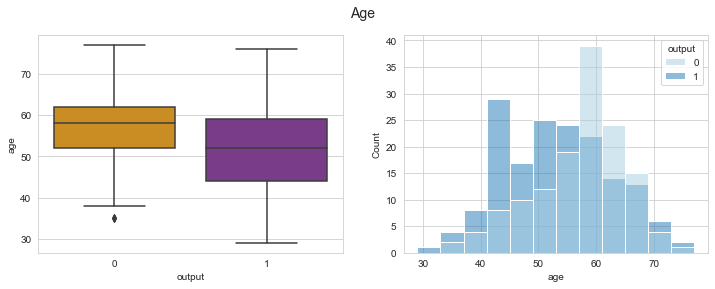

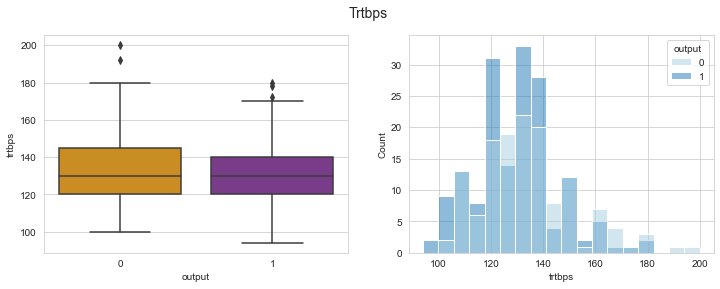

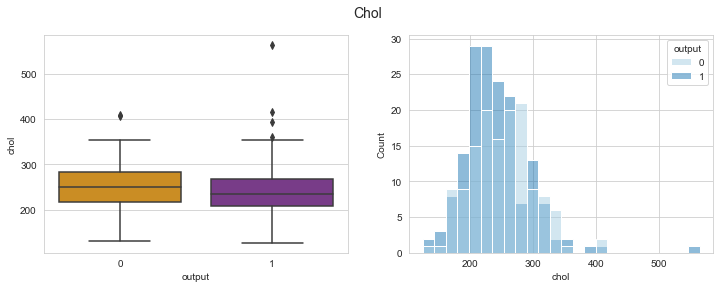

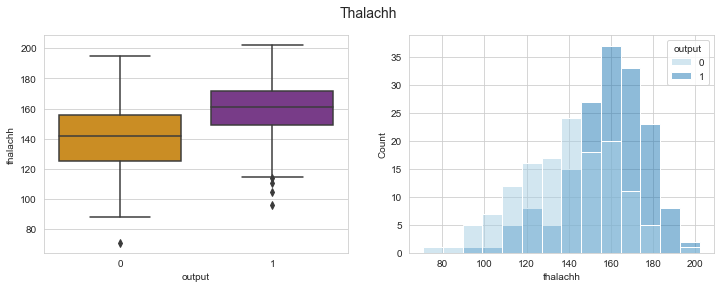

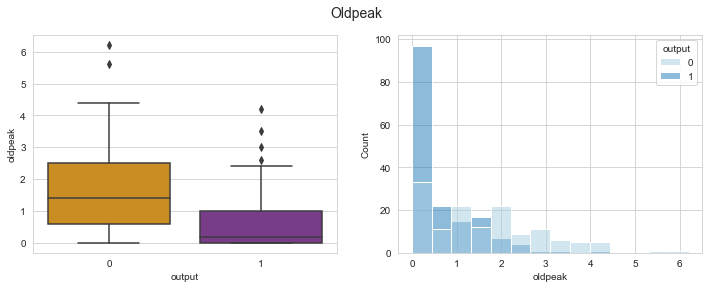

In [7]:
num_cols= [col for col in df.columns if col not in category_columns and df[col].dtype!='O']
for  i in num_cols:
    f,ax = plt.subplots(1,2,figsize=(12,4))
    f.suptitle(i.title(), size=14)
    sns.boxplot(ax=ax[0],y=i,x='output',data=df,palette='CMRmap_r')
    sns.histplot(ax=ax[1],x=i,hue='output',data=df,palette='Paired')
    plt.show()